In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
pd.read_excel('gta_c.xlsx')
data = pd.read_excel('gta_c.xlsx', parse_dates=["Date"], index_col="Date")

In [33]:
data.head()

,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Puissance Réactive (MVAR) produite,Température vapeur (°C)
Date,,,,,,
2020-01-01 00:00:00.000,712.995789,55.856407,231.413406,3002.122314,No Data,452.617828
2020-01-01 01:00:00.000,713.796997,54.910316,230.703949,3001.251221,No Data,452.889404
2020-01-01 01:59:59.990,710.395142,55.609695,NaN,2999.197510,No Data,NaN
2020-01-01 02:59:59.985,709.053345,54.513893,NaN,2998.625977,No Data,NaN
2020-01-01 03:59:59.980,711.194092,55.240372,230.742188,3001.751465,No Data,452.796936


In [12]:
data.shape

(17521, 6)

In [13]:
df = data.dropna()
df = df.drop(['Puissance Réactive (MVAR) produite'], axis=1)

In [14]:
df.head()

,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Température vapeur (°C)
Date,,,,,
2020-01-01 00:00:00.000,712.995789,55.856407,231.413406,3002.122314,452.617828
2020-01-01 01:00:00.000,713.796997,54.910316,230.703949,3001.251221,452.889404
2020-01-01 03:59:59.980,711.194092,55.240372,230.742188,3001.751465,452.796936
2020-01-01 04:59:59.975,710.792725,54.275158,230.413254,3000.750000,452.700378
2020-01-01 07:59:59.960,715.920410,53.776802,230.749146,3001.125244,452.089355


In [15]:
df.shape

(16446, 5)

In [16]:
df.columns

Index(['Pertes de charges FC (mmH2O) (JFC2)',
       'Puissance électrique (MW) production', 'Débit vapeur HP (t/h)',
       'Vitesse de rotation (tr/min)', 'Température vapeur (°C)'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16446 entries, 2020-01-01 00:00:00 to 2021-12-30 23:58:32.400000
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Pertes de charges FC (mmH2O) (JFC2)   16446 non-null  float64
 1   Puissance électrique (MW) production  16446 non-null  float64
 2   Débit vapeur HP (t/h)                 16446 non-null  float64
 3   Vitesse de rotation (tr/min)          16446 non-null  float64
 4   Température vapeur (°C)               16446 non-null  float64
dtypes: float64(5)
memory usage: 770.9 KB


In [18]:
# decrire les données

df.describe()

,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Température vapeur (°C)
count,16446.000000,16446.000000,16446.000000,1.644600e+04,16446.000000
mean,659.077282,43.284280,185.079321,2.796831e+03,433.067332
std,185.954252,13.806376,59.127090,7.514168e+02,83.926052
min,-0.825459,-0.097027,0.000000,1.232595e-32,20.226973
25%,644.262299,40.442662,170.221371,2.999530e+03,444.938004
50%,669.757782,48.353024,210.277405,3.000381e+03,449.862671
75%,715.985092,51.446177,220.059860,3.001152e+03,457.309898
max,1237.866211,62.878201,231.854095,3.030630e+03,496.828735


In [19]:
df.duplicated().any() # Vérification des lignes en double

False

In [20]:
is_long = df['Vitesse de rotation (tr/min)'] < 2980
is_long.head()

Date
2020-01-01 00:00:00.000    False
2020-01-01 01:00:00.000    False
2020-01-01 03:59:59.980    False
2020-01-01 04:59:59.975    False
2020-01-01 07:59:59.960    False
Name: Vitesse de rotation (tr/min), dtype: bool

In [21]:
df[df['Vitesse de rotation (tr/min)'] < 2980]

,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Température vapeur (°C)
Date,,,,,
2020-01-18 01:59:57.950,2.541615,-0.078438,0.000000e+00,1.875000e+01,439.608795
2020-01-18 02:59:57.945,2.345431,-0.079903,0.000000e+00,1.355253e-18,425.605591
2020-01-18 05:59:57.930,2.431316,-0.081238,0.000000e+00,1.869867e+01,381.911926
2020-01-18 08:59:57.915,2.395491,-0.078908,0.000000e+00,1.862500e+01,338.518127
2020-01-18 09:59:57.910,118.040901,-0.079773,0.000000e+00,1.874951e+01,348.835571
...,...,...,...,...,...
2021-12-15 02:58:34.305,390.992310,-0.075508,7.217799e-18,1.862500e+01,452.385712
2021-12-15 05:58:34.290,0.407491,-0.074375,8.813771e-17,5.266838e+02,456.213196
2021-12-15 06:58:34.285,401.092438,-0.076025,8.813771e-17,1.875000e+01,442.511444


In [22]:
df=df.drop(index=df[df['Vitesse de rotation (tr/min)'] < 2980].index)

In [34]:
df

,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Température vapeur (°C)
Date,,,,,
2020-01-01 00:00:00.000,712.995789,55.856407,231.413406,3002.122314,452.617828
2020-01-01 01:00:00.000,713.796997,54.910316,230.703949,3001.251221,452.889404
2020-01-01 03:59:59.980,711.194092,55.240372,230.742188,3001.751465,452.796936
2020-01-01 04:59:59.975,710.792725,54.275158,230.413254,3000.750000,452.700378
2020-01-01 07:59:59.960,715.920410,53.776802,230.749146,3001.125244,452.089355
...,...,...,...,...,...
2021-12-30 19:58:32.420,927.717590,51.297493,224.031921,3000.306641,440.237732
2021-12-30 20:58:32.415,926.755615,51.614880,224.161255,2998.371338,439.894440
2021-12-30 21:58:32.410,928.325562,51.278214,224.319183,3001.936768,439.689484


In [158]:
#low_speed = (df['Vitesse de rotation (tr/min)'] < 2980)
#df.loc[low_speed]

#df.drop[low_speed]


In [24]:
max_thresold = df['Puissance électrique (MW) production'].quantile(0.99)
max_thresold

56.93508415222168

In [35]:
df[df['Puissance électrique (MW) production']>max_thresold]

,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Température vapeur (°C)
Date,,,,,
2020-01-01 21:59:59.890,711.250977,57.138947,230.699692,3000.625000,452.843384
2020-01-03 08:59:59.715,714.864014,57.480808,230.910004,3000.497314,452.045959
2020-01-06 10:59:59.345,707.823486,57.048019,231.508820,3000.625000,451.332336
2020-01-08 03:59:59.140,712.362854,57.174870,230.584839,2999.750000,451.967804
2020-01-08 04:59:59.135,712.349182,57.018871,230.654388,3001.317139,451.726807
...,...,...,...,...,...
2021-02-15 09:59:10.630,731.658203,59.306316,227.185150,3001.375000,442.293121
2021-02-15 10:59:10.625,730.654480,59.171238,227.199753,3000.891113,441.072571
2021-02-15 22:59:10.565,721.791504,56.998753,225.396713,3001.995605,442.652832


In [26]:
min_thresold = df['Puissance électrique (MW) production'].quantile(0.02)
min_thresold

29.108497619628906

In [27]:
df[df['Puissance électrique (MW) production']<min_thresold]
df=df[(df['Puissance électrique (MW) production']>min_thresold)]

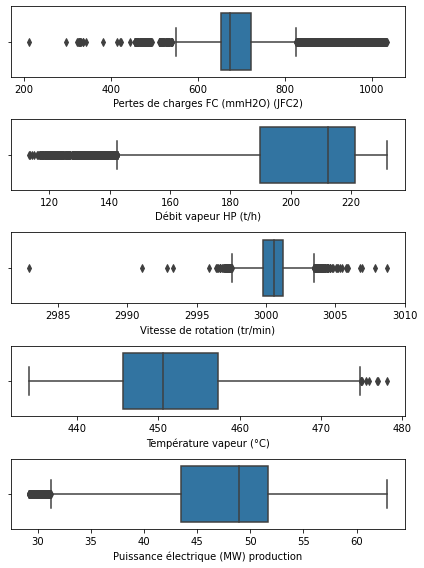

In [28]:
#  Vérification des valeurs aberrantes

fig, axs = plt.subplots(5, figsize = (6,8))

plt1 = sns.boxplot(df['Pertes de charges FC (mmH2O) (JFC2)'], ax = axs[0])
plt2 = sns.boxplot(df['Débit vapeur HP (t/h)'], ax = axs[1])
plt3 = sns.boxplot(df['Vitesse de rotation (tr/min)'], ax = axs[2])
plt3 = sns.boxplot(df['Température vapeur (°C)'], ax = axs[3])
plt3 = sns.boxplot(df['Puissance électrique (MW) production'], ax = axs[4])

plt.tight_layout()

Conclusion: il y a beaucoup de valeurs aberrantes dans les données

# On va Tracer les relations par paires dans notre jeu de données.

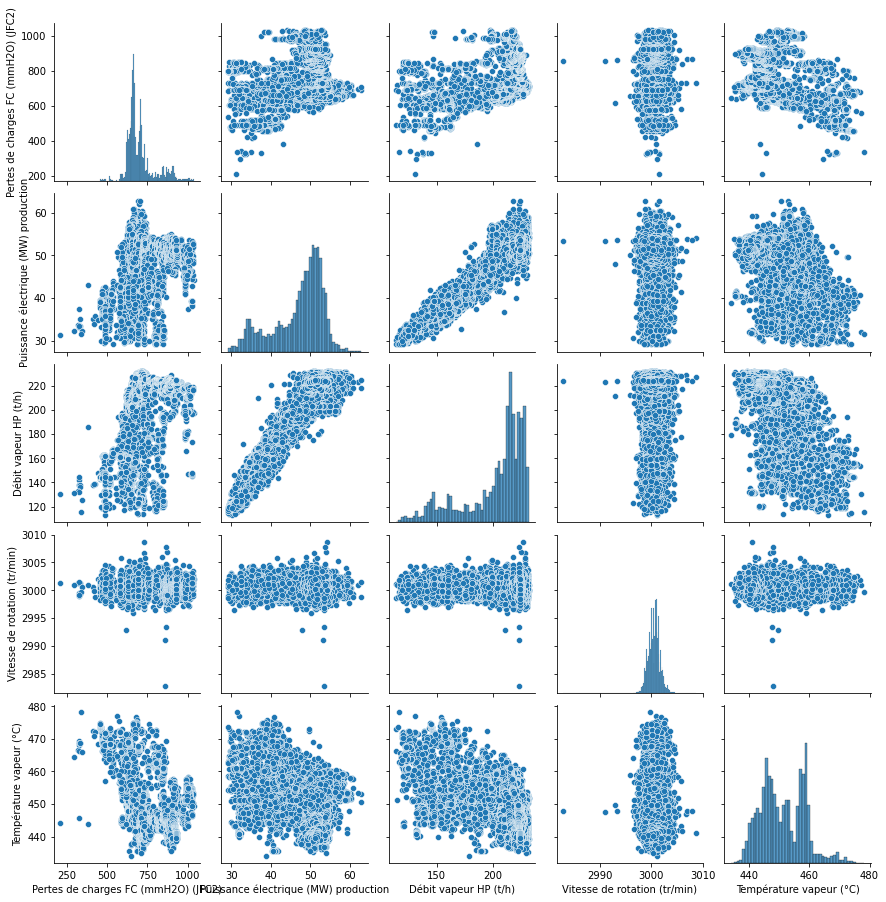

In [29]:
sns.pairplot(df)

Comment la Puissance electrique produite est liée aux autres variables

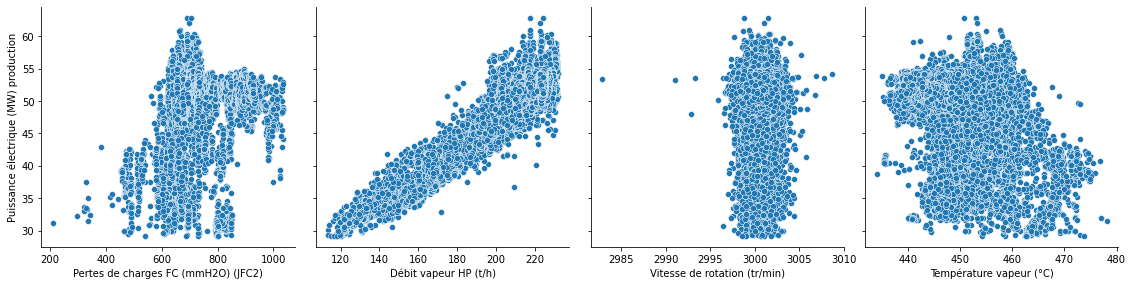

In [204]:
sns.pairplot(df, x_vars=['Pertes de charges FC (mmH2O) (JFC2)', 'Débit vapeur HP (t/h)', 
                         'Vitesse de rotation (tr/min)', 'Température vapeur (°C)'], 
             y_vars='Puissance électrique (MW) production', height=4, aspect=1, kind='scatter')
plt.show()

On va afficher aussi un diagramme avec une estimation de la densité du noyau et un histogramme avec une taille de corbeille déterminée automatiquement avec une règle de référence

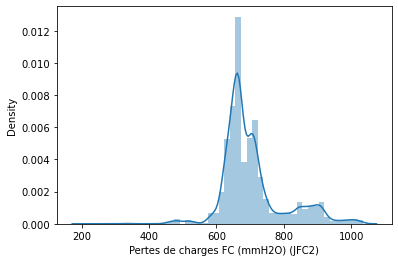

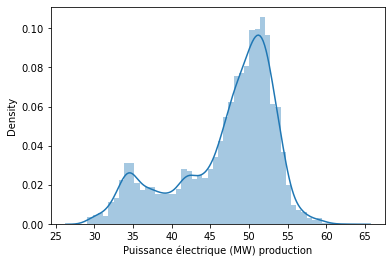

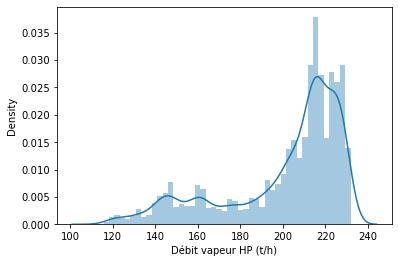

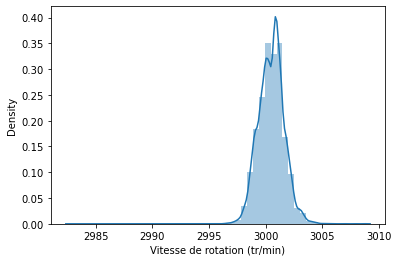

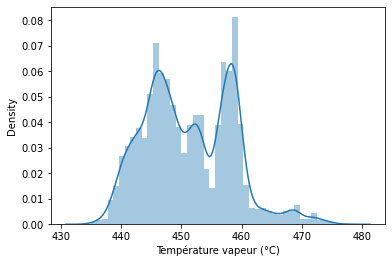

In [36]:
for col in df.select_dtypes('float'):
    
    plt.figure()
    sns.distplot(df[col])

Calculons maintenant la corrélation par paire des colonnes

In [37]:
df.corr()

,Pertes de charges FC (mmH2O) (JFC2),Puissance électrique (MW) production,Débit vapeur HP (t/h),Vitesse de rotation (tr/min),Température vapeur (°C)
Pertes de charges FC (mmH2O) (JFC2),1.000000,0.360126,0.374930,0.036398,-0.414863
Puissance électrique (MW) production,0.360126,1.000000,0.940182,-0.008227,-0.285213
Débit vapeur HP (t/h),0.374930,0.940182,1.000000,-0.018314,-0.361866
Vitesse de rotation (tr/min),0.036398,-0.008227,-0.018314,1.000000,-0.032628
Température vapeur (°C),-0.414863,-0.285213,-0.361866,-0.032628,1.000000


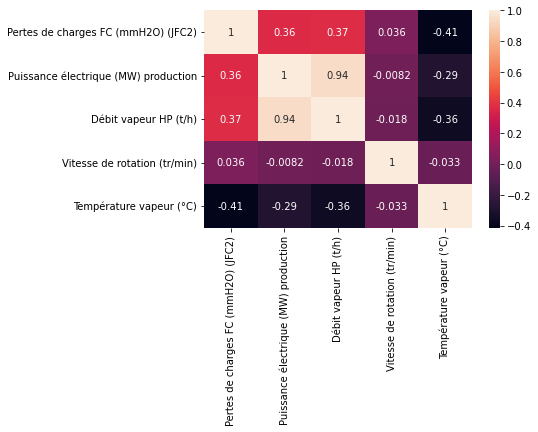

In [38]:
#matrice de confusion
#sns.heatmap((cor), annot = True)

sns.heatmap(df.corr(), annot = True)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [41]:
#Collecte des données

X = df[['Débit vapeur HP (t/h)']]
y = df['Puissance électrique (MW) production']

In [199]:
#trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)

(12005, 1)
(3002, 1)
(12005,)
(3002,)
(15007, 1)


In [165]:
#testset['Puissance électrique (MW) production'].value_counts()

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [262]:
#X_train, y_train = preprocessing(trainset)

In [45]:
# fit (entrainement)
model.fit(X_train, y_train)

LinearRegression()

In [46]:
#Printing the model coefficients

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Intercept: 3.725459401830534
Coefficient: [0.21532018]


In [47]:
print('Equation de regression: Puissance électrique (MW) production = 0.5869871337735759 + 0.23071378 * Débit vapeur HP (t/h)')

Equation de regression: Puissance électrique (MW) production = 0.5869871337735759 + 0.23071378 * Débit vapeur HP (t/h)


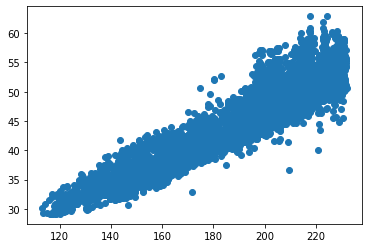

In [48]:
plt.scatter(X, y)

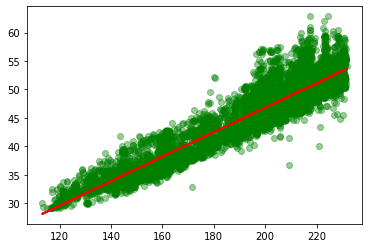

In [49]:
#Ligne de meilleur ajustement

plt.scatter(X_train, y_train, c='g', alpha=0.4)

y_pred = model.predict(X_train)
plt.plot(X_train, y_pred, c='r', linewidth=2)

In [50]:
X

,Débit vapeur HP (t/h)
Date,
2020-01-01 00:00:00.000,231.413406
2020-01-01 01:00:00.000,230.703949
2020-01-01 03:59:59.980,230.742188
2020-01-01 04:59:59.975,230.413254
2020-01-01 07:59:59.960,230.749146
...,...
2021-12-30 19:58:32.420,224.031921
2021-12-30 20:58:32.415,224.161255
2021-12-30 21:58:32.410,224.319183


In [51]:
#Prédiction du résultat de l'ensemble de test et d'entraînement  

y_pred= model.predict(X_test)  
y_pred_model= model.predict(X_test)  

In [52]:
print("Prediction pour testset: {}".format(y_pred))

Prediction pour testset: [52.95965312 51.13534223 41.00925816 ... 49.52255346 37.88203938
 51.94725137]


In [53]:
#Valeur réelle et valeur prédite

model_diff = pd.DataFrame({'Valeur réelle': y_test, 'Valeur prédite': y_pred_model, 'Différence': y_test-y_pred_model})
model_diff

,Valeur réelle,Valeur prédite,Différence
Date,,,
2021-02-22 00:59:09.835,53.926693,52.959653,0.967040
2021-10-02 00:58:43.195,50.191078,51.135342,-0.944264
2020-08-26 20:59:31.335,39.651855,41.009258,-1.357403
2020-06-20 19:59:39.380,53.975906,51.897840,2.078066
2021-07-16 08:58:52.515,52.151405,52.605230,-0.453825
...,...,...,...
2021-12-14 11:58:34.380,38.191616,35.116784,3.074832
2020-12-16 05:59:17.970,47.584618,44.686319,2.898298
2021-11-09 21:58:38.530,52.006863,49.522553,2.484309


In [54]:
#Prédire pour n'importe quelle valeur

model.predict([[231]])

array([53.46442151])

In [55]:
# imprimer la valeur R au carré pour le modèle

from sklearn.metrics import accuracy_score

print('La valeur de R^2 du modèle: {:.2f}'.format(model.score(X,y)*100))

La valeur de R^2 du modèle: 88.39


In [56]:
# 0 signifie que le modèle est parfait. Par conséquent, la valeur doit être aussi proche de 0 que possible

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_model)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_model)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.7201432778808
Mean Square Error: 4.810026721296997
Root Mean Square Error: 2.1931773118690145


# Regression multiples

In [57]:
# Réglage de la valeur pour X et y

X = df[['Pertes de charges FC (mmH2O) (JFC2)', 'Débit vapeur HP (t/h)', 'Vitesse de rotation (tr/min)', 'Température vapeur (°C)']]
y = df['Puissance électrique (MW) production']

In [58]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=100)

In [59]:
pe = LinearRegression()  
pe.fit(X_train, y_train)

LinearRegression()

In [60]:
# Impression des coefficients du modèle

print(pe.intercept_)

# associer les noms des caractéristiques aux coefficients

list(zip(X, pe.coef_))

-204.10431476397628


[('Pertes de charges FC (mmH2O) (JFC2)', 0.002215751003017631),
 ('Débit vapeur HP (t/h)', 0.21890905257382967),
 ('Vitesse de rotation (tr/min)', 0.0587216355340871),
 ('Température vapeur (°C)', 0.06504692123739621)]

In [61]:
X_train.shape, y_train.shape

((12005, 4), (12005,))

<IPython.core.display.Javascript object>


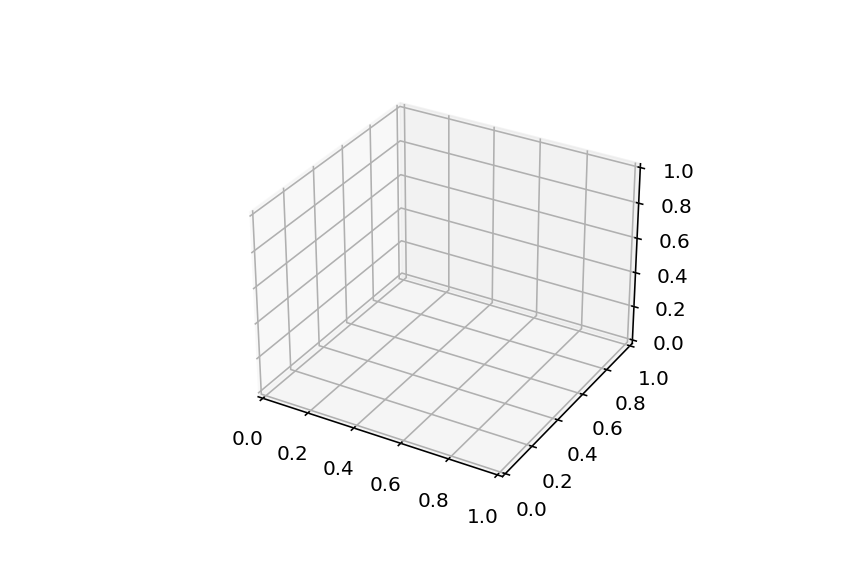

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [84]:
#plt.scatter(X_train[:,0], y_train)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook 
#activez cette ligne pour manipuler le graph 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:,0], X_train[:,1], y_train) # affiche en 3D la variable x_1, x_2, et la target y

# affiche les noms des axes
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

In [70]:
# Prédire le résultat de l'ensemble de test et d'entraînement

y_pred_pe= pe.predict(X_test)  
X_pred_pe= pe.predict(X_train)  

In [71]:
print("Prediction pour testset: {}".format(y_pred_pe))

Prediction pour testset: [52.6795573  51.44228014 40.60016704 ... 49.89436378 38.66502245
 51.66592707]


In [72]:
# Valeur réelle et valeur prédite

pe_diff = pd.DataFrame({'Valeur réelle': y_test, 'valeur prédite': y_pred_pe,'Difference': y_test-y_pred_pe})
pe_diff

,Valeur réelle,valeur prédite,Difference
Date,,,
2021-02-22 00:59:09.835,53.926693,52.679557,1.247136
2021-10-02 00:58:43.195,50.191078,51.442280,-1.251202
2020-08-26 20:59:31.335,39.651855,40.600167,-0.948312
2020-06-20 19:59:39.380,53.975906,52.232763,1.743144
2021-07-16 08:58:52.515,52.151405,52.233325,-0.081920
...,...,...,...
2021-12-14 11:58:34.380,38.191616,35.537861,2.653755
2020-12-16 05:59:17.970,47.584618,44.577829,3.006789
2021-11-09 21:58:38.530,52.006863,49.894364,2.112499


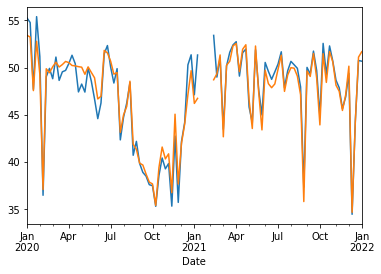

In [73]:
# TS de pe_diff
ax= pe_diff['Valeur réelle'].resample('W').mean().plot()
ax= pe_diff['valeur prédite'].resample('W').mean().plot()

In [74]:
# Prédire pour n'importe quelle valeur

pe.predict([[712, 231, 3000, 450]])

array([53.47731225])

In [75]:
# imprimer la valeur R au carré pour le modèle

print('R squared value of the model: {:.2f}'.format(pe.score(X,y)*100))

R squared value of the model: 88.84


In [76]:
# 0 signifie que le modèle est parfait. Par conséquent, la valeur doit être aussi proche de 0 que possible

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_pe)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_pe)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_pe))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.6850366303758646
Mean Square Error: 4.6270016244009415
Root Mean Square Error: 2.1510466346411325


In [128]:
#y_pred = pe.predict(X_test)

In [129]:
# Test (evaluation)
#pe.score(X_test, y_test)*100